In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [1]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [4]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [16]:
def makeCirc2(n, m, o, inp):
    initState = inp
    for i in range(0, m):
        initState += str(0)
    for i in range(0, o):
        initState += str(1)
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [29]:
encoderCirc = makeCirc2(6, 0, 2, '1000')
#getBloch(circ)

100011


In [30]:
encoderCirc.x(0)
encoderCirc.x(1)
encoderCirc.x(2)
encoderCirc.ccx(0, 1, 4)
encoderCirc.ccx(0, 2, 5)

for i in range(4, 6):
    encoderCirc.measure(i, i)

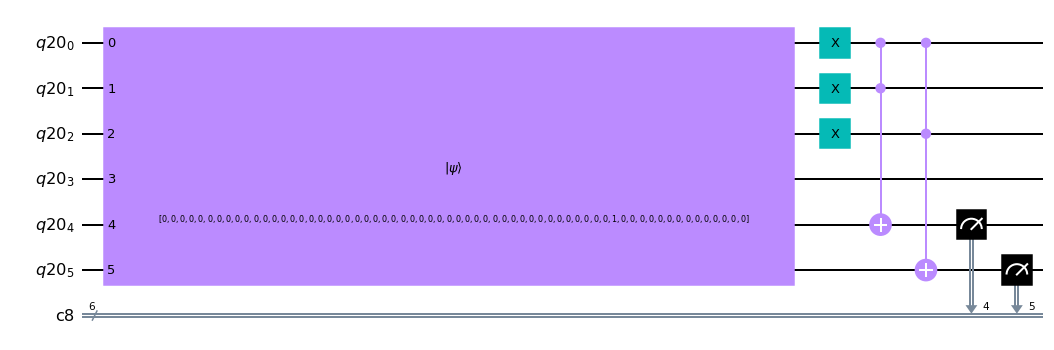

In [31]:
encoderCirc.draw('mpl')

In [32]:
getMeasure(encoderCirc, 1)[0][::-1][4:]

'11'

In [49]:
decoderCirc = makeCirc2(4, 1, 1, '10')

1001


In [50]:
decoderCirc.cx(0, 3)
decoderCirc.ccx(1, 3, 2)
decoderCirc.cx(2, 1)
decoderCirc.cx(2, 3)
decoderCirc.swap(0, 1)
decoderCirc.cx(0, 1)

for i in range(0, 4):
    decoderCirc.measure(i, i)

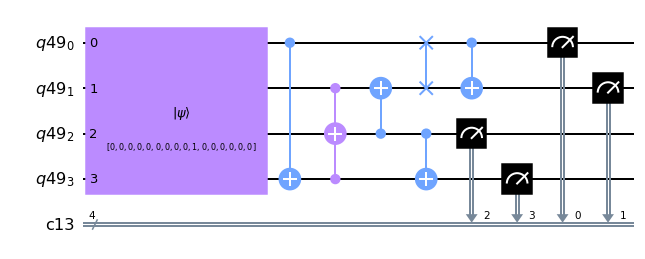

In [51]:
decoderCirc.draw('mpl')

In [52]:
getMeasure(decoderCirc, 1)[0][::-1]

'0100'

In [ ]:
#encoder gate

In [53]:
encCirc = QuantumCircuit(6)
encCirc.x(0)
encCirc.x(1)
encCirc.x(2)
encCirc.ccx(0, 1, 4)
encCirc.ccx(0, 2, 5)

In [56]:
Encoder = encCirc.to_gate(label = ' Encoder')

In [ ]:
#decoder gate

In [55]:
decCirc = QuantumCircuit(4)
decCirc.cx(0, 3)
decCirc.ccx(1, 3, 2)
decCirc.cx(2, 1)
decCirc.cx(2, 3)
decCirc.swap(0, 1)
decCirc.cx(0, 1)

In [57]:
Decoder = decCirc.to_gate(label=' Decoder')

In [ ]:
#circuit

In [58]:
circuit = QuantumCircuit(12)
circuit.append(Encoder, [0, 1, 2, 3, 4, 5])
circuit.append(Decoder, [6, 7, 8, 9])

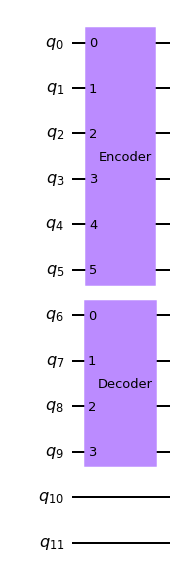

In [59]:
circuit.draw('mpl')